# Import needed libraries

## Import libraries for manipulating the data and statistic

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.weightstats import  ttest_ind as t_test
from scipy.stats import ttest_1samp, wilcoxon, ttest_ind, mannwhitneyu
import scipy.special as special
import emoji
from math import pi
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms
from scipy.stats import friedmanchisquare, rankdata, norm
from scipy.special import gammaln
from math import sqrt

## Import libraries for static ploting

In [27]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
# some nice colors from http://colorbrewer2.org/
COLOR1 = '#7fc97f'
COLOR2 = '#beaed4'
COLOR3 = '#fdc086'
COLOR4 = '#ffff99'
COLOR5 = '#386cb0'

# Statring the test and visulize the data

## Load the data

In [28]:
datafile = "./results/result_naomy3.csv"
df = pd.read_csv(datafile)

In [29]:
df

,Methods,Model,UCB1,Tomp. Sampl.,G. Prune,Less Magn.
0,LeCun (MNIST),0.98,0.99,0.99,0.94,0.88
1,Conv (Cifar10),0.81,0.82,0.82,0.78,0.71
2,Conv (Cifar100),0.43,0.44,0.44,0.40,0.35
3,EtoE Mem (bAbI),0.86,0.87,0.87,0.81,0.77


In [30]:
df1 = df.copy()



## Using Nonparametric tests

I am not sure the data comes from Guassian distribution  and less than 30 sample 

### alternative to paired t-test when data has an ordinary scale or when not
### normally distributed

## Start comparining all pruning algorithms

### Compute friedman test test by ranks between pruning methods

In [31]:
df1.rank(axis=1)

,Model,UCB1,Tomp. Sampl.,G. Prune,Less Magn.
0,3.0,4.5,4.5,2.0,1.0
1,3.0,4.5,4.5,2.0,1.0
2,3.0,4.5,4.5,2.0,1.0
3,3.0,4.5,4.5,2.0,1.0


In [32]:
df1.rank(axis=1).mean()

Model           3.0
UCB1            4.5
Tomp. Sampl.    4.5
G. Prune        2.0
Less Magn.      1.0
dtype: float64

In [33]:
df1.head(2)

,Methods,Model,UCB1,Tomp. Sampl.,G. Prune,Less Magn.
0,LeCun (MNIST),0.98,0.99,0.99,0.94,0.88
1,Conv (Cifar10),0.81,0.82,0.82,0.78,0.71


In [34]:
data =  np.stack((df1['Model'], df1['UCB1'], df1['Tomp. Sampl.'],
                  df1['Less Magn.'], df1['G. Prune']))

In [35]:
print(friedmanchisquare(df1['Model'], df1['UCB1'], df1['Tomp. Sampl.'],
               df1['Less Magn.'], df1['G. Prune']))

FriedmanchisquareResult(statistic=16.000000000000004, pvalue=0.0030191636511226016)


exec(open("nemopy.py").read())
nemenyi = NemenyiTestPostHoc(data)
meanRanks, pValues = nemenyi.do()

In [36]:
meanRanks = df1.rank(axis=1).mean() 

In [37]:
lst = list(df1.columns.values)
lst.remove('Methods')

In [38]:
len(lst)

5

In [39]:
df1.iloc[1].size

6

In [56]:
q = 2.728# pvalue = 0.05 and number of datasets 3.426041249
#q = 3.029694463 # pvalue = 0.1
N = (df1['Model'].size)
k = (df1.iloc[1].size)-1

In [57]:
CD = q * sqrt(k*(k+1)/(6.0*N))

In [58]:
CD

3.0499967213097134

In [59]:
lst

['Model', 'UCB1', 'Tomp. Sampl.', 'G. Prune', 'Less Magn.']

In [60]:
new_model_pairs = []
for m1,m2 in zip(meanRanks,lst): 
    print('\n',m2, m1, )


 Model 3.0

 UCB1 4.5

 Tomp. Sampl. 4.5

 G. Prune 2.0

 Less Magn. 1.0


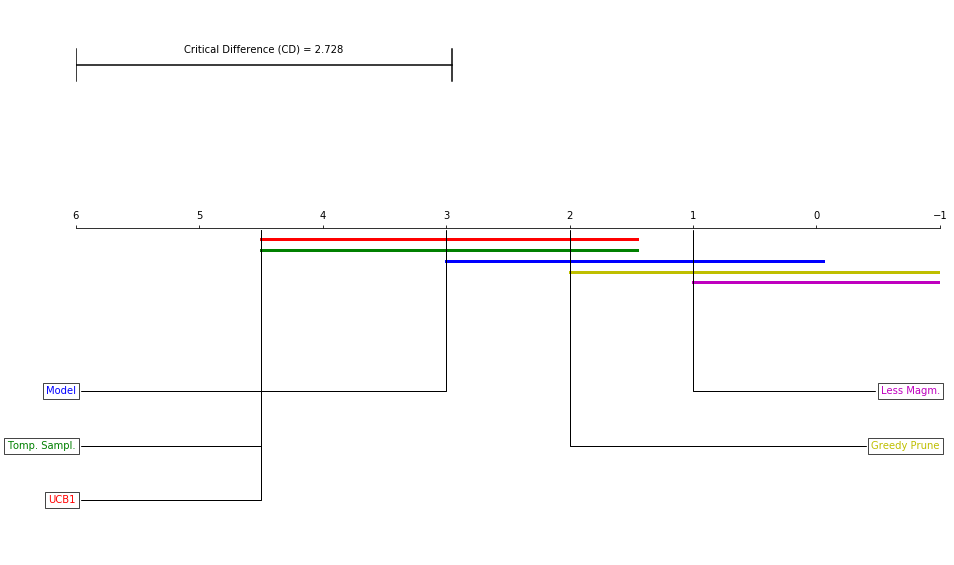

In [61]:
# input data
cd = CD
limits=(6,-1)
fig, ax = plt.subplots(figsize=(20,10))
plt.subplots_adjust(left=0.2, right=0.8)

# set up plot
ax.set_xlim(limits)
ax.set_ylim(0,1)
ax.spines['top'].set_position(('axes', 0.6))
#ax.xaxis.tick_top()
ax.xaxis.set_ticks_position('top')
ax.yaxis.set_visible(False)
for pos in ["bottom", "left", "right"]:
    ax.spines[pos].set_visible(False)

# CD bar
ax.plot([limits[0],limits[0]-cd], [.9,.9], color="k")
ax.plot([limits[0],limits[0]], [.9-0.03,.9+0.03], color="k")
ax.plot([limits[0]-cd,limits[0]-cd], [.9-0.03,.9+0.03], color="k") 
ax.text(limits[0]-cd/2., 0.92, "Critical Difference (CD) = 2.728", ha="center", va="bottom") 

# annotations
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
arrowprops=dict(arrowstyle="-",connectionstyle="angle,angleA=0,angleB=90")
kw = dict(xycoords='data',textcoords="axes fraction",
          arrowprops=arrowprops, bbox=bbox_props, va="center")


ax.annotate("UCB1", xy=(meanRanks[1], 0.6), xytext=(0,0.1),ha="right",  **kw, color="r")
ax.annotate("Tomp. Sampl.", xy=(meanRanks[2], 0.6), xytext=(0,0.2),ha="right",  **kw, color="g")
ax.annotate("Model", xy=(meanRanks[0], 0.6), xytext=(0,0.3),ha="right",  **kw, color="b")

ax.annotate("Greedy Prune", xy=(meanRanks[3], 0.6), xytext=(1,0.2),ha="right",  **kw, color="y")
ax.annotate("Less Magm.", xy=(meanRanks[4], 0.6), xytext=(1,0.3),ha="right",  **kw, color="m")

#bars
ax.plot([meanRanks[1],meanRanks[1]-CD],[0.58,0.58], color="r", lw=3)
ax.plot([meanRanks[2],meanRanks[2]-CD],[0.56,0.56], color="g", lw=3)
ax.plot([meanRanks[0],meanRanks[0]-CD],[0.54,0.54], color="b", lw=3)
ax.plot([meanRanks[3],meanRanks[3]-CD],[0.52,0.52], color="y", lw=3)
ax.plot([meanRanks[4],meanRanks[4]-CD],[0.5,0.5], color="m", lw=3)

plt.show()